In [324]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [290]:
train=pd.read_csv("/Users/tanvirislamullash/Projects/Titanic/titanic_train.csv")
test=pd.read_csv("/Users/tanvirislamullash/Projects/Titanic/titanic_test.csv")


In [177]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [179]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [180]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

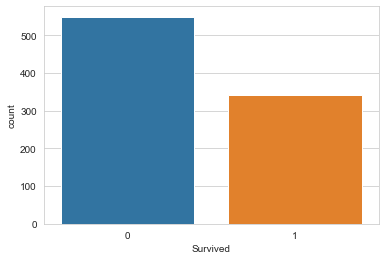

In [181]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

In [182]:
def plot(target,hue):
    sns.set_style('whitegrid')
    sns.countplot(x=target,hue=hue,data=train,palette='RdBu_r')

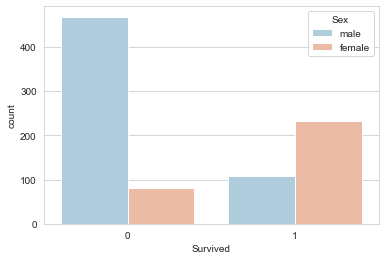

In [183]:
plot('Survived','Sex')

#### 1 for who had Cabin and 0 for who didnot have cabin

In [294]:
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

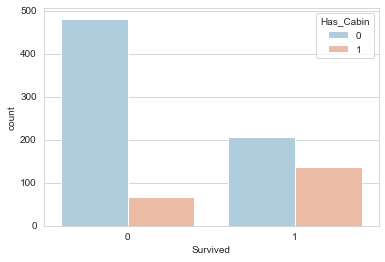

In [185]:
plot('Survived','Has_Cabin')

From the chart it is realised that number of deads are greater for  those who had no cabin 

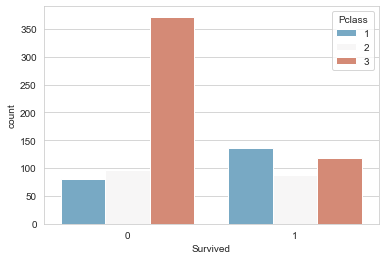

In [186]:
plot('Survived','Pclass')

Class 1 Passenger survived more than class 3 Passenger

In [295]:
full_data=[train,test]

In [296]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

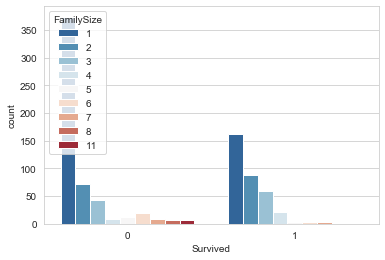

In [189]:
plot('Survived','FamilySize')

If total member from a certain family is more than 2 it is more likely to survive

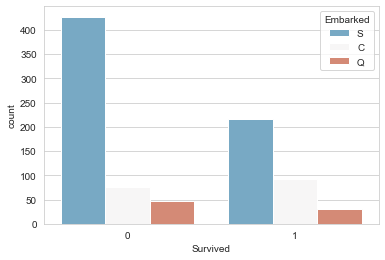

In [190]:
plot('Survived','Embarked')

#### Mostly are embarked 'S'. So filling Nan values with 'S'

In [297]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

#### Fill nan value of Fare with median value as there is only one missing value

In [298]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

#### Fill nan value of Age with Random value computed by Average and Standard Deviation

In [299]:
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

##### Mappins Sex column to 0 and 1

In [300]:
sex_mapping = {"male": 0, "female": 1}
for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

##### Mappins Embarked column to 0 ,1, 2

In [301]:
embark_mapping={'S': 0, 'C': 1, 'Q': 2}
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].map(embark_mapping)

In [302]:
drop_elements = ['Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

In [303]:
train = train.drop('PassengerId', axis = 1)

In [222]:
train.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize
0,0,3,0,22,0,7.2500,0,0,2
1,1,1,1,38,0,71.2833,1,1,2
2,1,3,1,26,0,7.9250,0,0,1
3,1,1,1,35,0,53.1000,0,1,2
4,0,3,0,35,0,8.0500,0,0,1


In [223]:
test.head()

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize
0,892,3,0,34,0,7.8292,2,0,1
1,893,3,1,47,0,7.0000,0,0,2
2,894,2,0,62,0,9.6875,2,0,1
3,895,3,0,27,0,8.6625,0,0,1
4,896,3,1,22,1,12.2875,0,0,3


(0, 9)

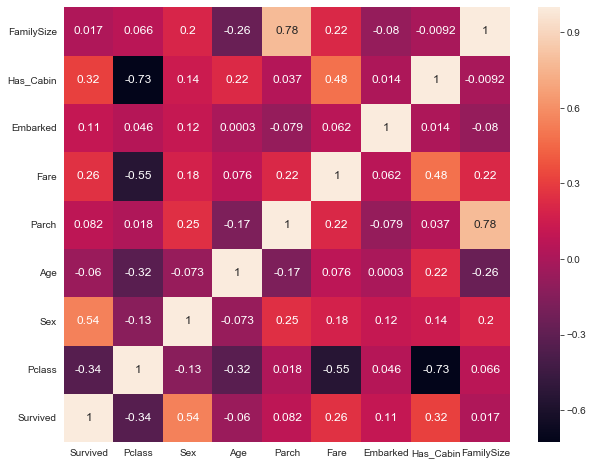

In [120]:
corr = train.corr()

fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(corr, annot = True, annot_kws={'size': 12})
ax.set_ylim(0 ,9)


### Splitting Data and Target`

In [304]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [305]:
grid_param = {
    
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto', 'sqrt', 'log2']
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=grid_param,cv=3,n_jobs =-1,verbose = 3)
grid_search.fit(train_data,target)

Fitting 3 folds for each of 7776 candidates, totalling 23328 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 830 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 4670 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 7550 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 11070 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 15230 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 20030 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 23328 out of 23328 | elapsed:  2.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'm

In [306]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 8}

In [307]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(train_data)

In [308]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = train_data.columns
vif

,VIF,Features
0,2.654629,Pclass
1,1.121280,Sex
2,1.206585,Age
3,2.661932,Parch
4,1.645982,Fare
5,1.053795,Embarked
6,2.170679,Has_Cabin
7,2.740673,FamilySize


No Multicolinearity

In [337]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,target,test_size=0.2,random_state=150)



# Create Decision Tree with max_depth = 3
decision_tree = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 9,
 max_features='sqrt',
 min_samples_leaf= 2,
 min_samples_split= 8)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
#acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print (" Train Accuracy : ",decision_tree.score(X_train, y_train))
print (" Test Accuracy : ",decision_tree.score( X_test,y_test))
#print ("  Accuracy : ",accuracy_score( y_test,y_pred))

 Train Accuracy :  0.8384831460674157
 Test Accuracy :  0.8156424581005587


# Building Model with Cross Validation

In [241]:
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(test))
depth_range = range(1, max_attributes + 1)

for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(max_depth = depth)
    
    for train_fold, valid_fold in cv.split(train):
        f_train = train.loc[train_fold] # Extract train data with cv indices
        f_valid = train.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.786729
         2          0.766654
         3          0.805843
         4          0.798077
         5          0.800287
         6          0.792447
         7          0.785718
         8          0.777878
         9          0.784619


For Max Depth = 3, Average Accuracy is highest.

## Building Final Decession Tree Model 

In [240]:
y_train = train['Survived']
x_train = train.drop(['Survived'], axis=1) 


# Create Decision Tree with max_depth = 3
decision_tree = DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(x_train, y_train)

acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print ("Accuracy : ",acc_decision_tree)



Accuracy :  82.27


##### Save Model

In [225]:
import pickle
filename = 'finalized_Decision_Tree_model.pickle'
pickle.dump(decision_tree, open(filename, 'wb'))

### Testing

In [227]:
loaded_model = pickle.load(open(filename, 'rb'))
x_test= test.drop("PassengerId", axis=1).copy()


prediction = loaded_model.predict(x_test)

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [289]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
